<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Validation-of-vis_cpu-against-pyuvsim-reference-simulations" data-toc-modified-id="Validation-of-vis_cpu-against-pyuvsim-reference-simulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Validation of <code>vis_cpu</code> against <code>pyuvsim</code> reference simulations</a></span><ul class="toc-item"><li><span><a href="#Setup-and-Metadata" data-toc-modified-id="Setup-and-Metadata-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup and Metadata</a></span><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Description" data-toc-modified-id="Description-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Software" data-toc-modified-id="Software-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Software</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#{First-Working-Section-Title}" data-toc-modified-id="{First-Working-Section-Title}-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>{First Working Section Title}</a></span></li></ul></li></ul></div>

# Validation of `vis_cpu` against `pyuvsim` reference simulations

Piyanat Kittiwisit, Steven Murray, Jackson Sipple and the HERA Validation Team

## Setup and Metadata

### Abstract

{Brief abstract with high-level discussion of goals.}

### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os

import hera_sim
from hera_sim.visibilities import VisCPU
import pyuvsim
import pyuvdata
import uvtools

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.titlesize'] = 'large'

# {All Imports should go here}

/lustre/aoc/projects/hera/jsipple/hera_sim/hera_sim/visibilities/__init__.py:27: UserWarning: PRISim failed to import.
  warnings.warn("PRISim failed to import.")
/lustre/aoc/projects/hera/jsipple/hera_sim/hera_sim/visibilities/__init__.py:33: UserWarning: VisGPU failed to import.
  warnings.warn("VisGPU failed to import.")
/lustre/aoc/projects/hera/jsipple/hera_sim/hera_sim/__init__.py:36: FutureWarning: 
In the next major release, all HERA-specific variables will be removed from the codebase. The following variables will need to be accessed through new class-like structures to be introduced in the next major release: 

noise.HERA_Tsky_mdl
noise.HERA_BEAM_POLY
sigchain.HERA_NRAO_BANDPASS
rfi.HERA_RFI_STATIONS

Additionally, the next major release will involve modifications to the package's API, which move toward a regularization of the way in which hera_sim methods are interfaced with; in particular, changes will be made such that the Simulator class is the most intuitive way of inter

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Description

In [3]:
print("Last executed: %s"%str(datetime.now()))

Last executed: 2020-03-04 21:51:13.990685


{If you installed the ``jupyter_contrib_nbextensions``, then enable the "Python Markdown" extension, remove the line above, and keep the following line. Otherwise, remove the following line and keep the line above.}

Last executed: {str(datetime.now())}

- **Major Step Description:** {Insert standard description of major step}
- **Minor Variation Description:** {Insert standard description of minor step}
- **Pipelines Tested:** {Brief list of explicit pipelines tested in the notebook}
- **Criteria**:
  1. {Explicit Criterion for success 1}
  2. {Explicit Criterion for success 2}
  

### Summary

The results of this validation test, in reference to the outlined criteria, are
1. {Test results for criteria 1}
2. {Test results for criteria 2...}

{Brief notes on anything else interesting that was noted during testing}

### Software

HERA software used in this validation test, with associate git commit hash:

* {``pyuvdata``: `a8f6b6fdd7261`}
* {If you have the Python Markdown extension, you can do this: ``pyuvdata``: ``{pyuvdata.version.git_hash}``
* {``hera_qm``: `f3e32c3cef36cbd`}
* {etc.}

Versions of other software used in this validation test:

* {``numpy``: vx.x.x}
* {etc. (only list imported modules).}

### Data

The following paths reflect the exact locations of all data used in this test:

In [4]:
path_obs = "/lustre/aoc/projects/hera/jsipple/pyuvsim/reference_simulations/"

obs_1_1_uniform = os.path.join(path_obs, "obsparam_ref_1.1.yaml")
obs_1_2_gauss = os.path.join(path_obs, "obsparam_ref_1.2_gauss.yaml")
obs_1_2_uniform = os.path.join(path_obs, "obsparam_ref_1.2_uniform.yaml")
obs_1_3_gauss = os.path.join(path_obs, "obsparam_ref_1.3_gauss.yaml")
obs_1_3_uniform = os.path.join(path_obs, "obsparam_ref_1.3_uniform.yaml")
obs_1_4_gauss = os.path.join(path_obs, "obsparam_ref_1.4.yaml")


path_ref = "/lustre/aoc/projects/hera/ref_sim/simulation_results/"

uvfits_ref_1_1_uniform= os.path.join(path_ref, "ref_1.1_uniform.uvfits")
uvfits_ref_1_2_gauss = os.path.join(path_ref, "ref_1.2_gauss.uvfits")
uvfits_ref_1_2_uniform = os.path.join(path_ref, "ref_1.2_uniform.uvfits")
uvfits_ref_1_3_gauss = os.path.join(path_ref, "ref_1.3_gauss.uvfits")
uvfits_ref_1_3_uniform = os.path.join(path_ref, "ref_1.3_uniform.uvfits")
uvfits_ref_1_4_gauss= os.path.join(path_ref, "ref_1.4_gauss.uvfits")

## {First Working Section Title}

{Put any desciptions etc. here and do your tests!}

{Here is an example image with an associated figure caption. Try to remember to use a semi-colon at the end of the code cell so that only the figure is shown.}

NameError: name 'uvn1' is not defined

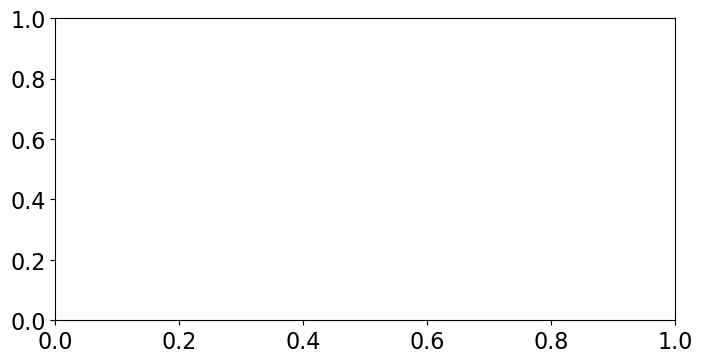

**Figure 1** | This is the real component of a simulated noise waterfall for a 10-minute file.


In [39]:
viscpu_sim = VisCPU(obsparams=obs_1_2_uniform)
viscpu_sim.simulate()
viscpu_UV = viscpu_sim.uvdata
print(viscpu_sim.lsts)

[1.06435644 1.06442936 1.06450228 ... 1.08134011 1.08141303 1.08148595]


In [43]:
viscpu_UV.write_uvfits("viscpu_1.2_uniform.uvfits", force_phase=True)

The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.


KeyboardInterrupt: 

In [40]:
ref_UV = pyuvdata.UVData()
ref_UV.read(uvfits_ref_1_2_uniform)

In [46]:
ref_lsts = ref_UV.lst_array[::ref_UV.Nbls]
viscpu_lsts = viscpu_UV.lst_array[::viscpu_UV.Nbls]

print(ref_lsts)
print(len(ref_lsts))
print(viscpu_lsts)
print(len(viscpu_lsts))

print(np.max(np.absref_lsts-viscpu_lsts))

[1.06435645 1.06442935 1.06450229 ... 1.08133999 1.08141284 1.08148607]
86400
[1.06435644 1.06442936 1.06450228 ... 1.08134011 1.08141303 1.08148595]
86400


AttributeError: module 'numpy' has no attribute 'absref_lsts'

In [41]:
print(np.max(np.abs(ref_UV.antenna_positions - viscpu_UV.antenna_positions)))

7.105427357601002e-15


In [25]:
def compare_uvw(ref_UV, viscpu_UV):
    ref_u = ref_UV.uvw_array[:,0]
    ref_v = ref_UV.uvw_array[:,1]
    ref_w = ref_UV.uvw_array[:,2]

    viscpu_u = viscpu_UV.uvw_array[:,0]
    viscpu_v = viscpu_UV.uvw_array[:,1]
    viscpu_w = viscpu_UV.uvw_array[:,2]

    diff = {'u': ref_u - viscpu_u,
            'v': ref_v - viscpu_v,
            'w': ref_w - viscpu_w}

    fig, ax = plt.subplots(3,3)

    ax[0, 0].set_title("pyuvsim")
    ax[0, 1].set_title("vis_cpu")
    ax[0, 2].set_title("pyuvsim - vis_cpu")

    [axis.set_xlabel("u") for axis in ax[0]]
    ax[0, 0].set_ylabel("v")
    ax[0, 0].scatter(ref_u, ref_v)
    ax[0, 1].scatter(viscpu_u, viscpu_v)
    ax[0, 2].scatter(diff['u'], diff['v'])

    [axis.set_xlabel("u") for axis in ax[1]]
    ax[1, 0].set_ylabel("w")
    ax[1, 0].scatter(ref_u, ref_w)
    ax[1, 1].scatter(viscpu_u, viscpu_w)
    ax[1, 2].scatter(diff['u'], diff['w'])

    [axis.set_xlabel("v") for axis in ax[2]]
    ax[2, 0].set_ylabel("w")
    ax[2, 0].scatter(ref_v, ref_w)
    ax[2, 1].scatter(viscpu_v, viscpu_w)
    ax[2, 2].scatter(diff['v'], diff['w'])
    
    plt.figure()
    plt.title("Difference Vector Field")
    plt.xlabel("u")
    plt.ylabel("v")
    
    plt.quiver(ref_u, ref_v, diff['u'], diff['v'], np.sqrt(diff['u']**2 + diff['v']**2))
    plt.colorbar()

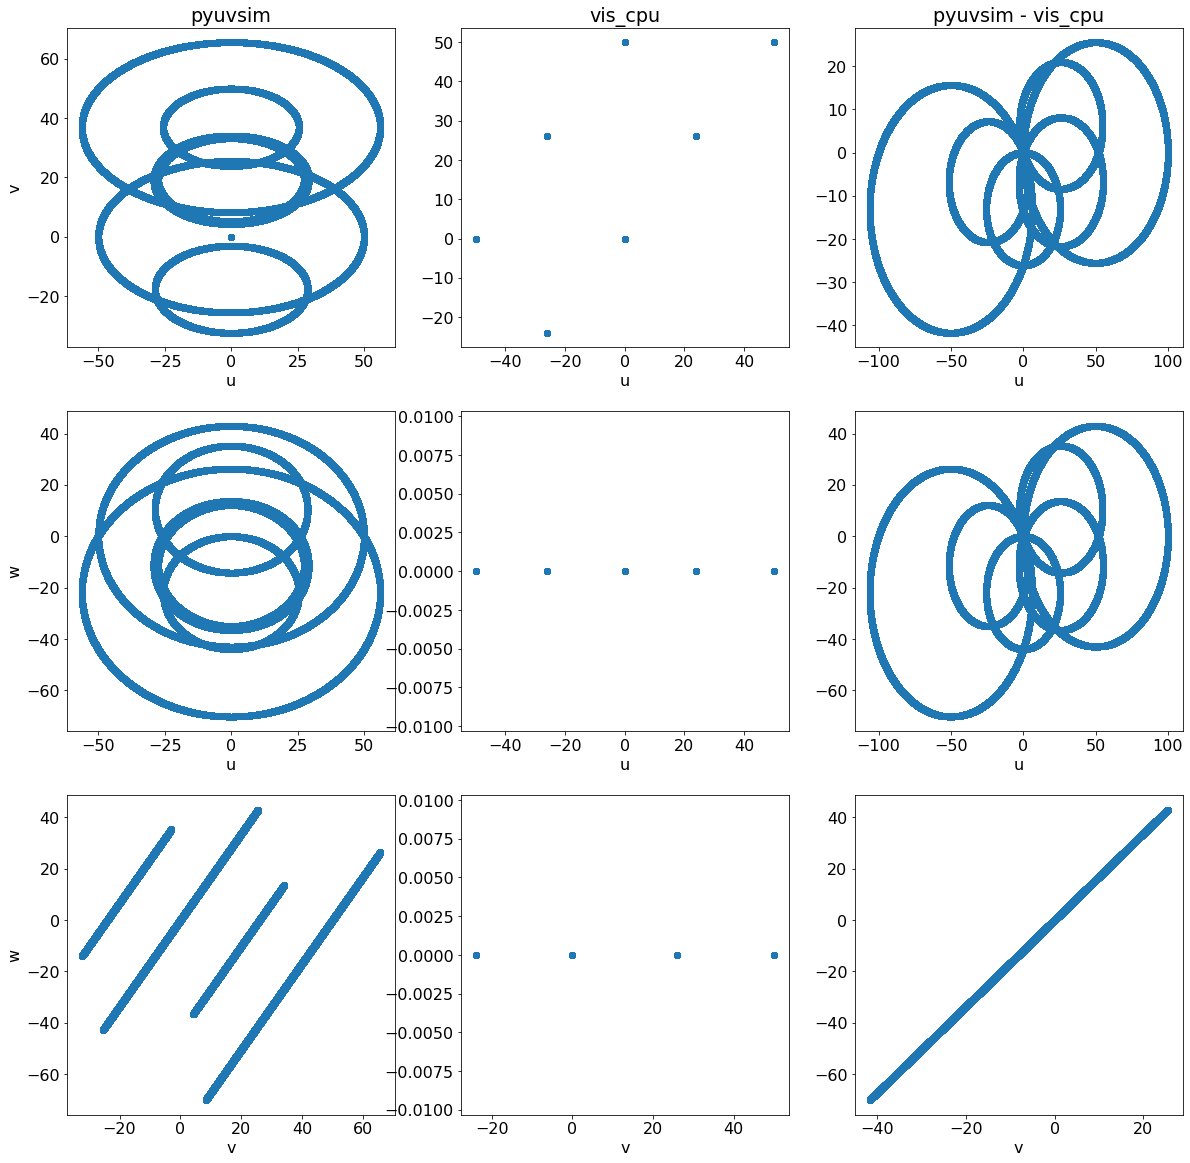

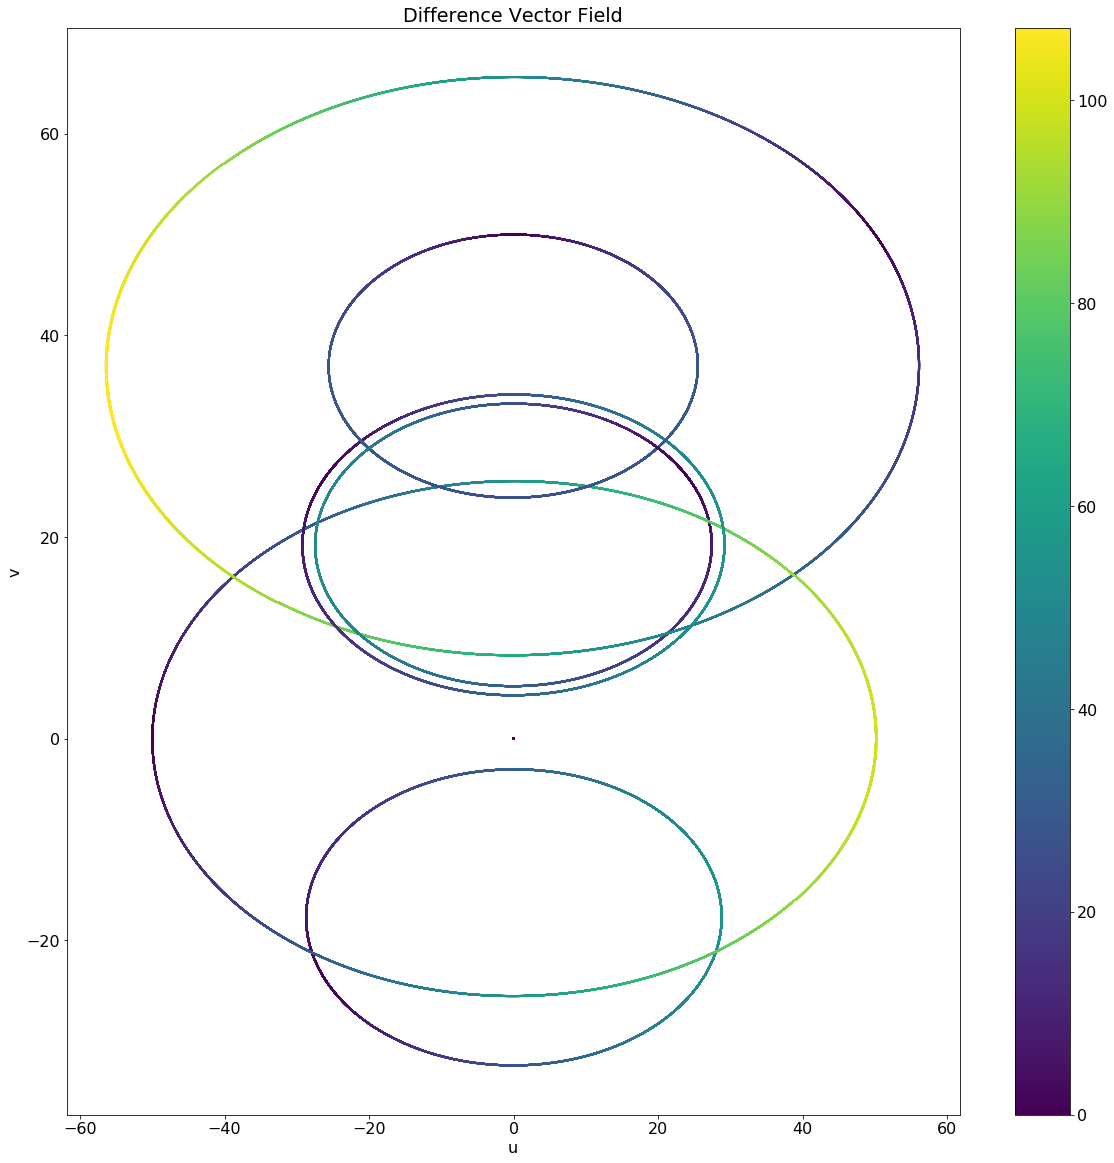

In [30]:
compare_uvw(ref_UV, viscpu_UV)

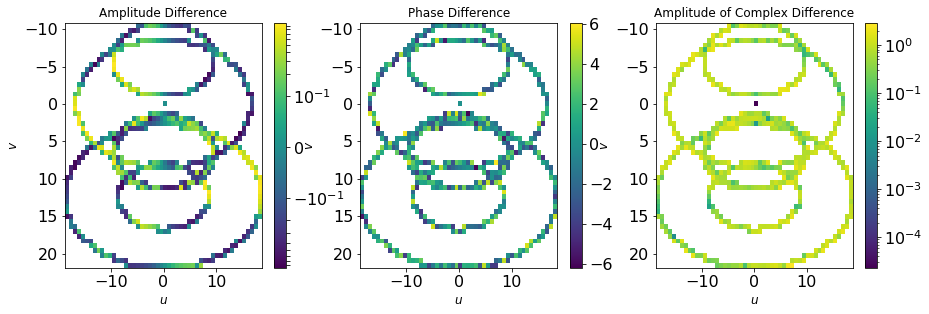

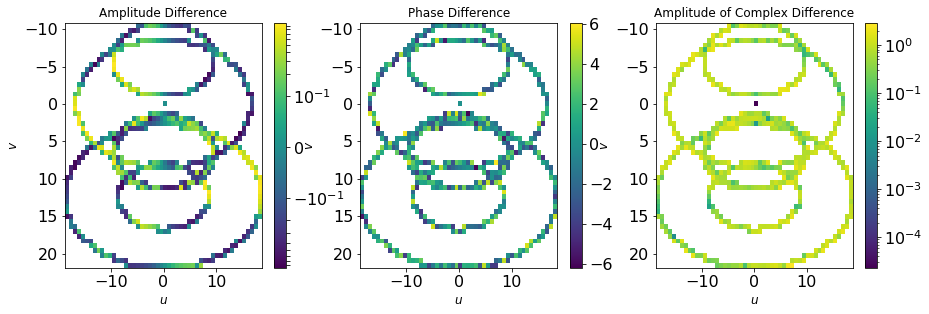

In [31]:
uvtools.plot.plot_diff_uv(ref_UV, viscpu_UV, check_metadata=False)

In [38]:
viscpu_sim = VisCPU(obsparams=obs_1_1_uniform)
viscpu_sim.simulate()
viscpu_UV = viscpu_sim.uvdata
print(viscpu_sim.lsts)

[1.06435644]


In [33]:
ref_UV = pyuvdata.UVData()
ref_UV.read(uvfits_ref_1_1_uniform)

In [34]:
print(np.max(np.abs(ref_UV.antenna_positions - viscpu_UV.antenna_positions)))

2.2737367544323206e-13


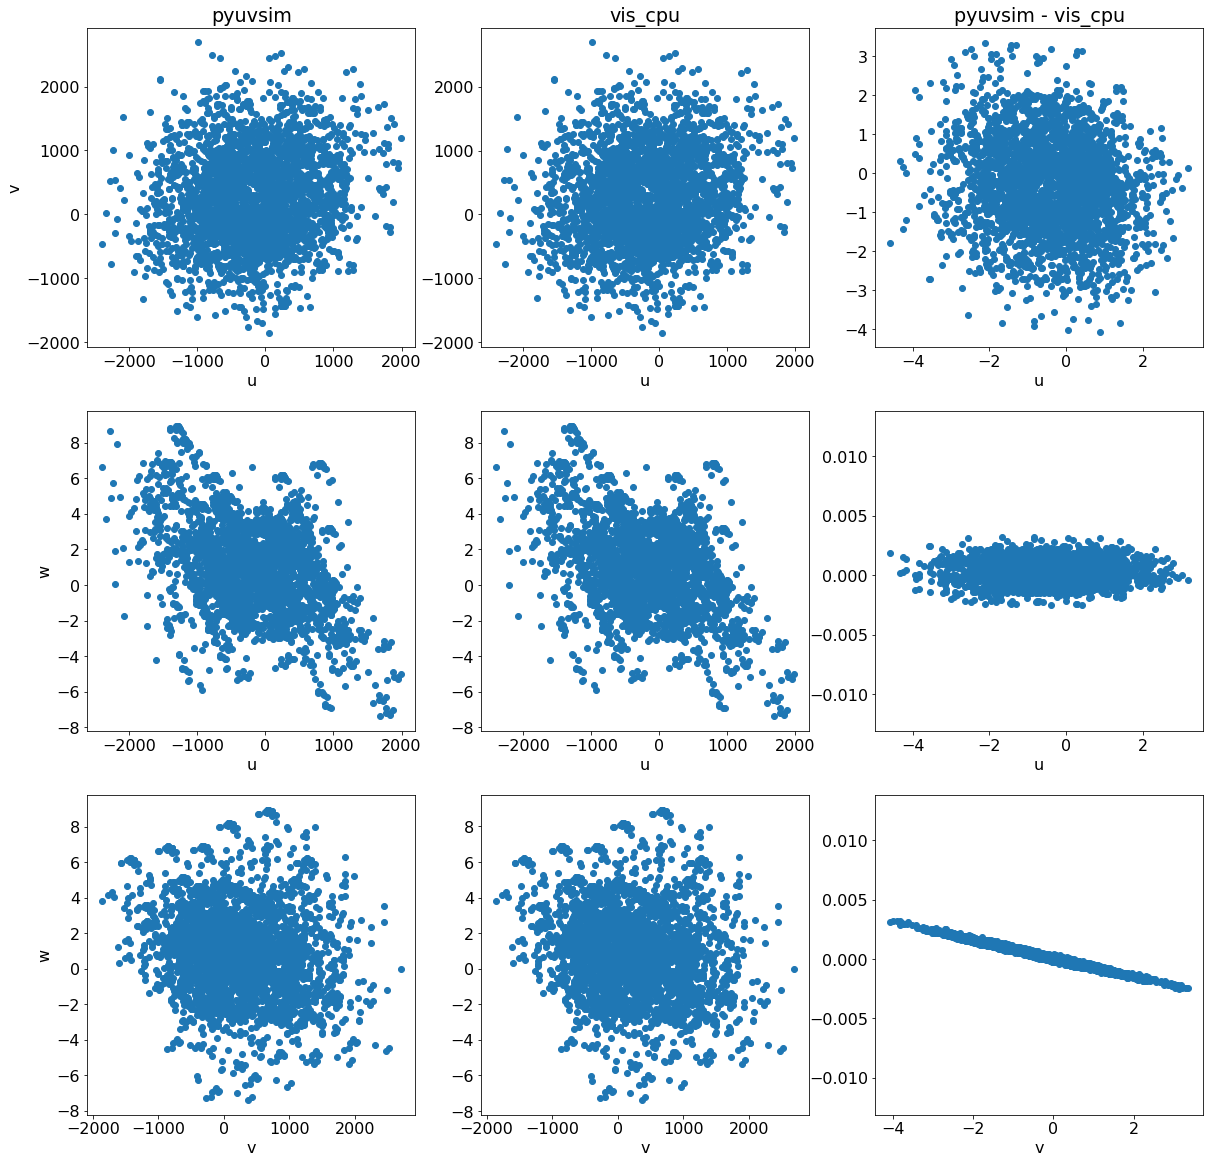

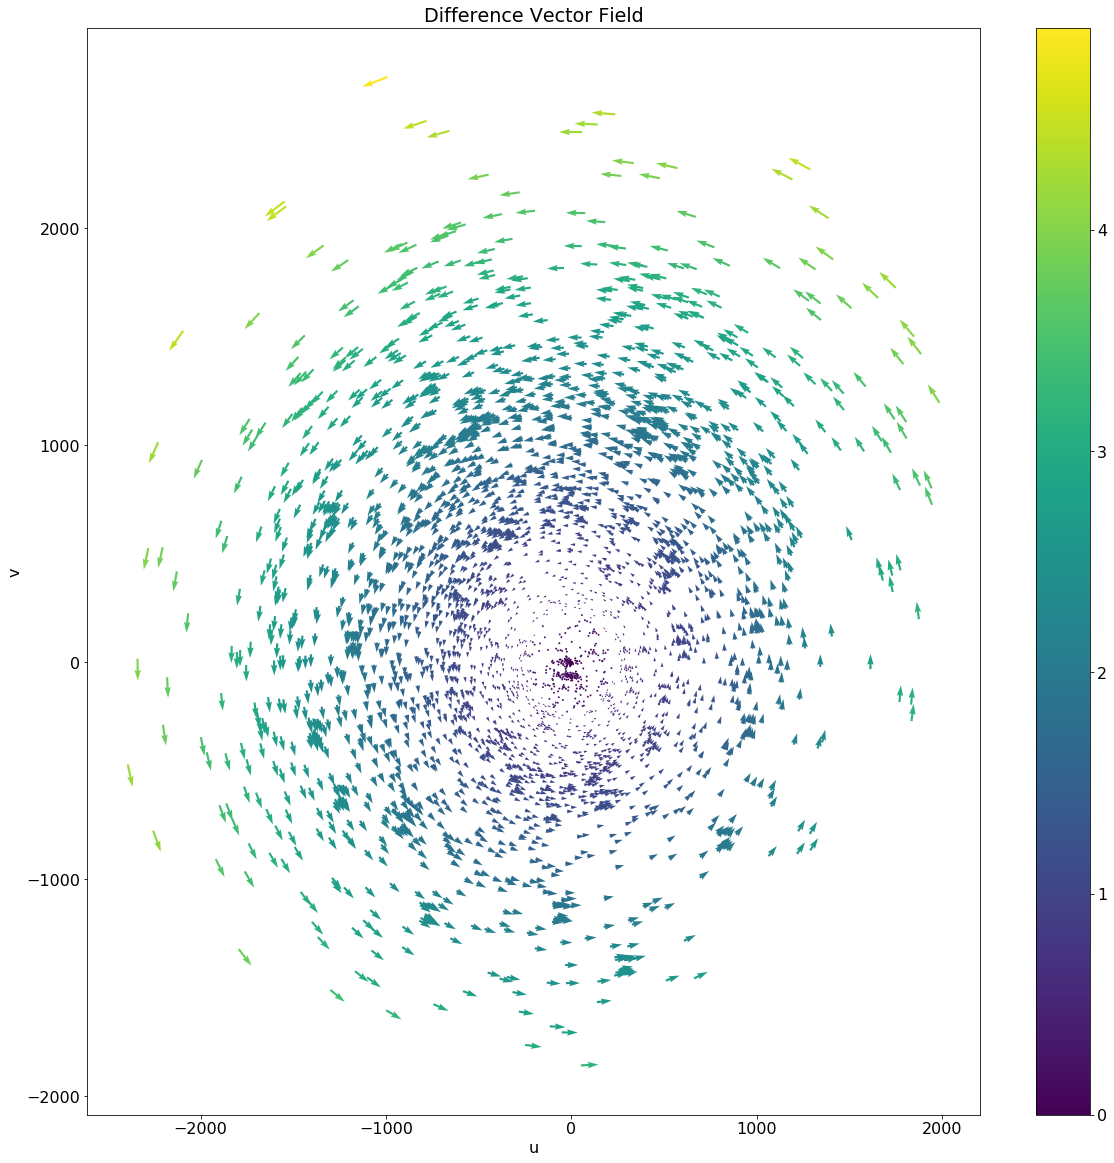

In [37]:
compare_uvw(ref_UV, viscpu_UV)

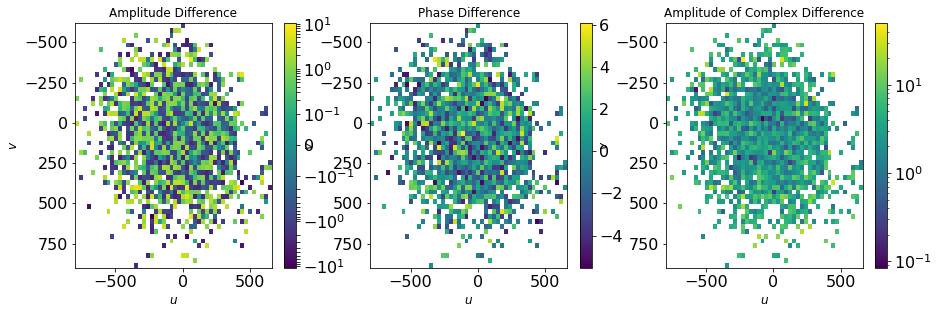

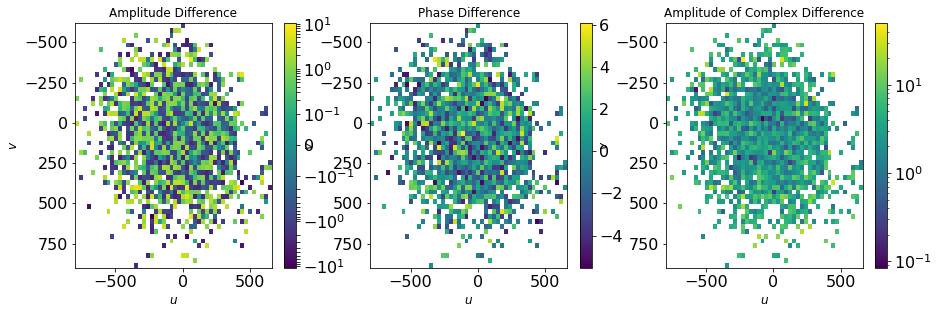

In [35]:
uvtools.plot.plot_diff_uv(ref_UV, viscpu_UV, check_metadata=False)

In [36]:
viscpu_antpairpols = viscpu_UV.get_antpairpols()
ref_antpairpols = ref_UV.get_antpairpols()
viscpu_antpairpols == ref_antpairpols

True

In [13]:
uvtools.plot.plot_diff_1d(ref_UV, viscpu_UV, ref_antpairpols[0], check_metadata=False)

NameError: name 'warnings' is not defined

Mean of empty slice.
invalid value encountered in double_scalars
Attempting to set identical left == right == 100.0 results in singular transformations; automatically expanding.
Attempting to set identical bottom == top == 1.0643564457892467 results in singular transformations; automatically expanding.


ValueError: Axis limits cannot be NaN or Inf

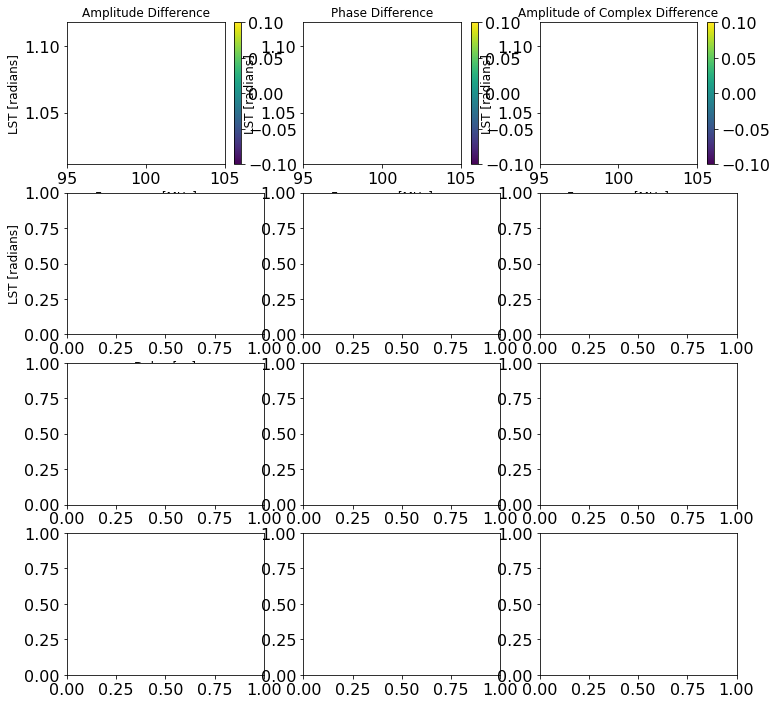

In [14]:
uvtools.plot.plot_diff_waterfall(ref_UV, ref_UV, antpairpol=(44,45,'xx'), check_metadata=False)